In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt                   # For charts and visualizations
from IPython.display import Image                 # For displaying images in the notebook
from IPython.display import display 
from sklearn.model_selection import train_test_split 


In [2]:
def dateparse(d):
    return pd.to_datetime(d)

In [81]:
df = pd.read_csv(os.path.join(os.getcwd(), 'data/', 'trainset.csv'),
                        encoding= 'unicode_escape', low_memory=False, parse_dates=['measured_at'], date_parser=dateparse)


In [9]:
df = df.drop(columns=['index'])

In [10]:
y = df.error
X = df.drop(columns=['error','error_category'])

                                                Train with Gradient Boosting on ERROR / NO-ERROR   
_____________________________________________________________________________________________________________________

In [16]:
param_grid = {
    'n_estimators': 1000,
    'colsample_bytree':0.8,
    #"early_stopping_rounds":[10], 
    'objective': 'binary',
    'max_depth': 10,
    'num_leaves': 100,
    'metric' : 'logloss',
    #'reg_alpha': [1.1, 1.2, 1.3],
    #'reg_lambda': [1.1, 1.2, 1.3],
    'learning_rate':0.1,
    #'is_unbalance': ['True']
    'scale_pos_weight':10,
    #'min_split_gain': [0.3, 0.4],
    'subsample': 0.9,
    #'subsample_freq': [20]
}

In [19]:
X = X.drop(columns='measured_at')

In [20]:
from lightgbm import LGBMClassifier

model = LGBMClassifier()
model.set_params(**param_grid)

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify=y,
                                                    test_size=0.2,
                                                    random_state=11) 


In [21]:
model.fit(X_train,y_train)

LGBMClassifier(colsample_bytree=0.8, max_depth=10, metric='logloss',
               n_estimators=1000, num_leaves=100, objective='binary',
               scale_pos_weight=10, subsample=0.9)

In [22]:
y_pred = model.predict(X_test, raw_score=True)

In [29]:
y_pred2 = model.predict(X_test)

In [27]:
from sklearn import metrics 
print(f"Test's ROC AUC: {metrics.roc_auc_score(y_test, y_pred):.5f}")
print(f"Test's logloss: {metrics.log_loss(y_test, y_pred):.5f}")
print(f"Test's AUPRC: {metrics.average_precision_score(y_test, y _pred):.5f}")

Test's ROC AUC: 0.99873
Test's logloss: 0.11243
Test's AUPRC: 0.99176


In [30]:
print(f"Test's AUPRC: {metrics.accuracy_score(y_test, y_pred2):.5f}")

Test's AUPRC: 0.99632


In [32]:
from sklearn import metrics
def confusion_matrix(y_test, y_pred):
    df_cm = pd.DataFrame(metrics.confusion_matrix(y_test, y_pred), index = [0,1], columns=[0,1])
    sns.heatmap(df_cm, annot=True, cmap="YlGnBu", fmt='g')
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()

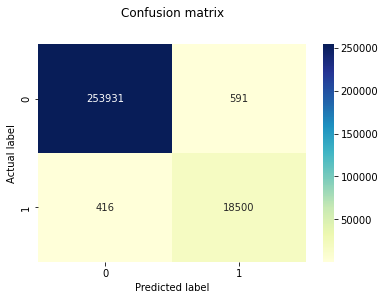

In [33]:
confusion_matrix(y_test,y_pred2)

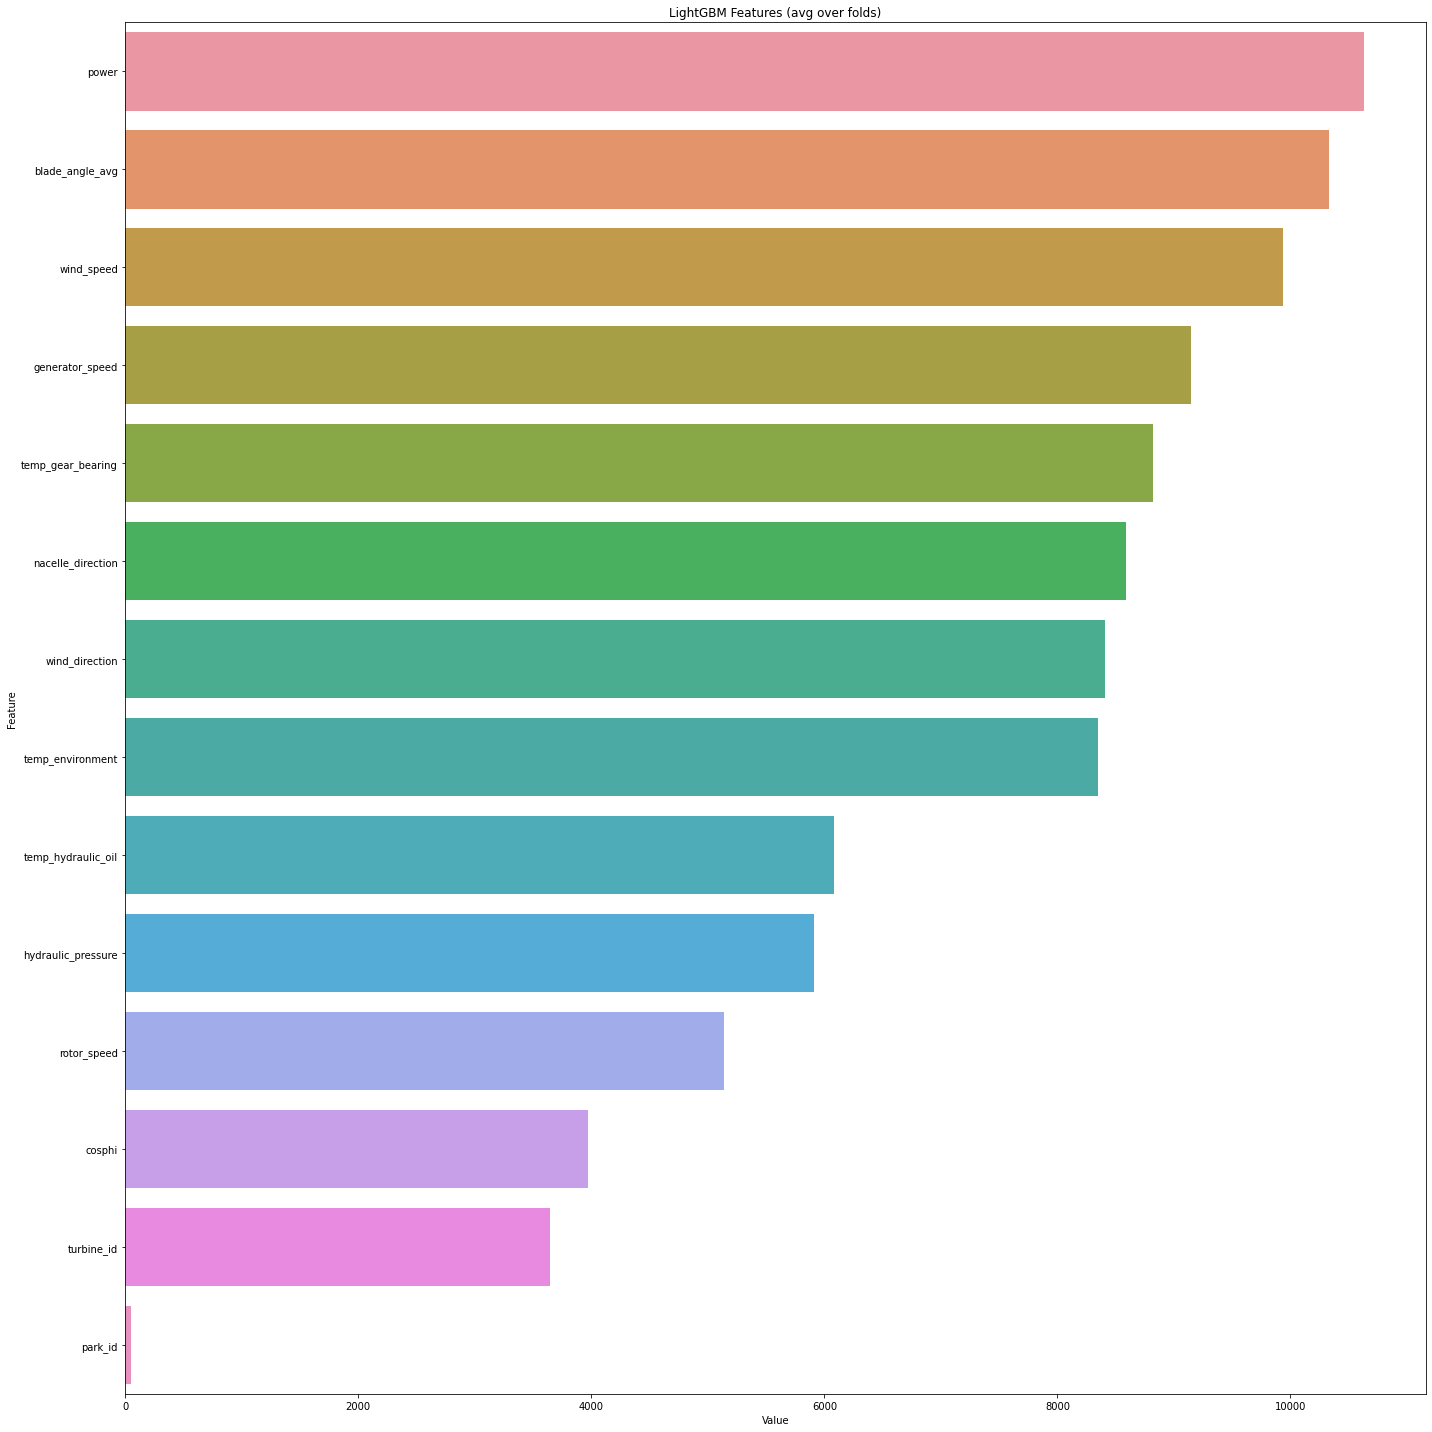

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# sorted(zip(clf.feature_importances_, X.columns), reverse=True)
feature_imp = pd.DataFrame(sorted(zip(model.feature_importances_,X.columns)), columns=['Value','Feature'])

plt.figure(figsize=(20, 20))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()
plt.show()

In [46]:
df = df.drop(columns = ['measured_at', 'error_category'])

In [35]:
df.park_id.value_counts()

2    1088578
1     278612
Name: park_id, dtype: int64

In [59]:
dfx = df.dropna()

In [60]:
df1 = dfx[dfx.park_id == 1]
df2 = dfx[dfx.park_id == 2]

In [61]:
y1 = df1.error
y2 = df2.error

X1 = df1.drop(columns=['error'])
X2 = df2.drop(columns=['error'])

In [62]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1,
                                                    y1,
                                                    stratify=y1,
                                                    test_size=0.2,
                                                    random_state=11) 

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,
                                                    y2,
                                                    stratify=y2,
                                                    test_size=0.2,
                                                    random_state=11) 

In [64]:
model.fit(X_train1,y_train1)
y_pred1 = model.predict(X_test2)
print(f"Test's f1: {metrics.f1_score(y_test2, y_pred1):.5f}")

Test's f1: 0.78217


In [65]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0, max_depth=3)
clf.fit(X_train1,y_train1)


DecisionTreeClassifier(max_depth=3, random_state=0)

In [68]:
y_pred2 = clf.predict(X_test2)
print(f"Test's f1: {metrics.f1_score(y_test2, y_pred2):.5f}")

Test's f1: 0.83080


In [76]:
plot_tree_model(clf,X_test2)

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

[Text(0.5, 0.875, 'blade_angle_avg <= 24.65\ngini = 0.067\nsamples = 132396\nvalue = [127805, 4591]'),
 Text(0.25, 0.625, 'wind_speed <= 1.029\ngini = 0.033\nsamples = 129954\nvalue = [127774, 2180]'),
 Text(0.125, 0.375, 'wind_speed <= 1.012\ngini = 0.007\nsamples = 127953\nvalue = [127514, 439]'),
 Text(0.0625, 0.125, 'gini = 0.006\nsamples = 127695\nvalue = [127331, 364]'),
 Text(0.1875, 0.125, 'gini = 0.412\nsamples = 258\nvalue = [183, 75]'),
 Text(0.375, 0.375, 'blade_angle_avg <= 4.65\ngini = 0.226\nsamples = 2001\nvalue = [260, 1741]'),
 Text(0.3125, 0.125, 'gini = 0.499\nsamples = 195\nvalue = [94, 101]'),
 Text(0.4375, 0.125, 'gini = 0.167\nsamples = 1806\nvalue = [166, 1640]'),
 Text(0.75, 0.625, 'rotor_speed <= 0.003\ngini = 0.025\nsamples = 2442\nvalue = [31, 2411]'),
 Text(0.625, 0.375, 'blade_angle_avg <= 28.45\ngini = 0.006\nsamples = 2210\nvalue = [7, 2203]'),
 Text(0.5625, 0.125, 'gini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.6875, 0.125, 'gini = 0.005\nsamples

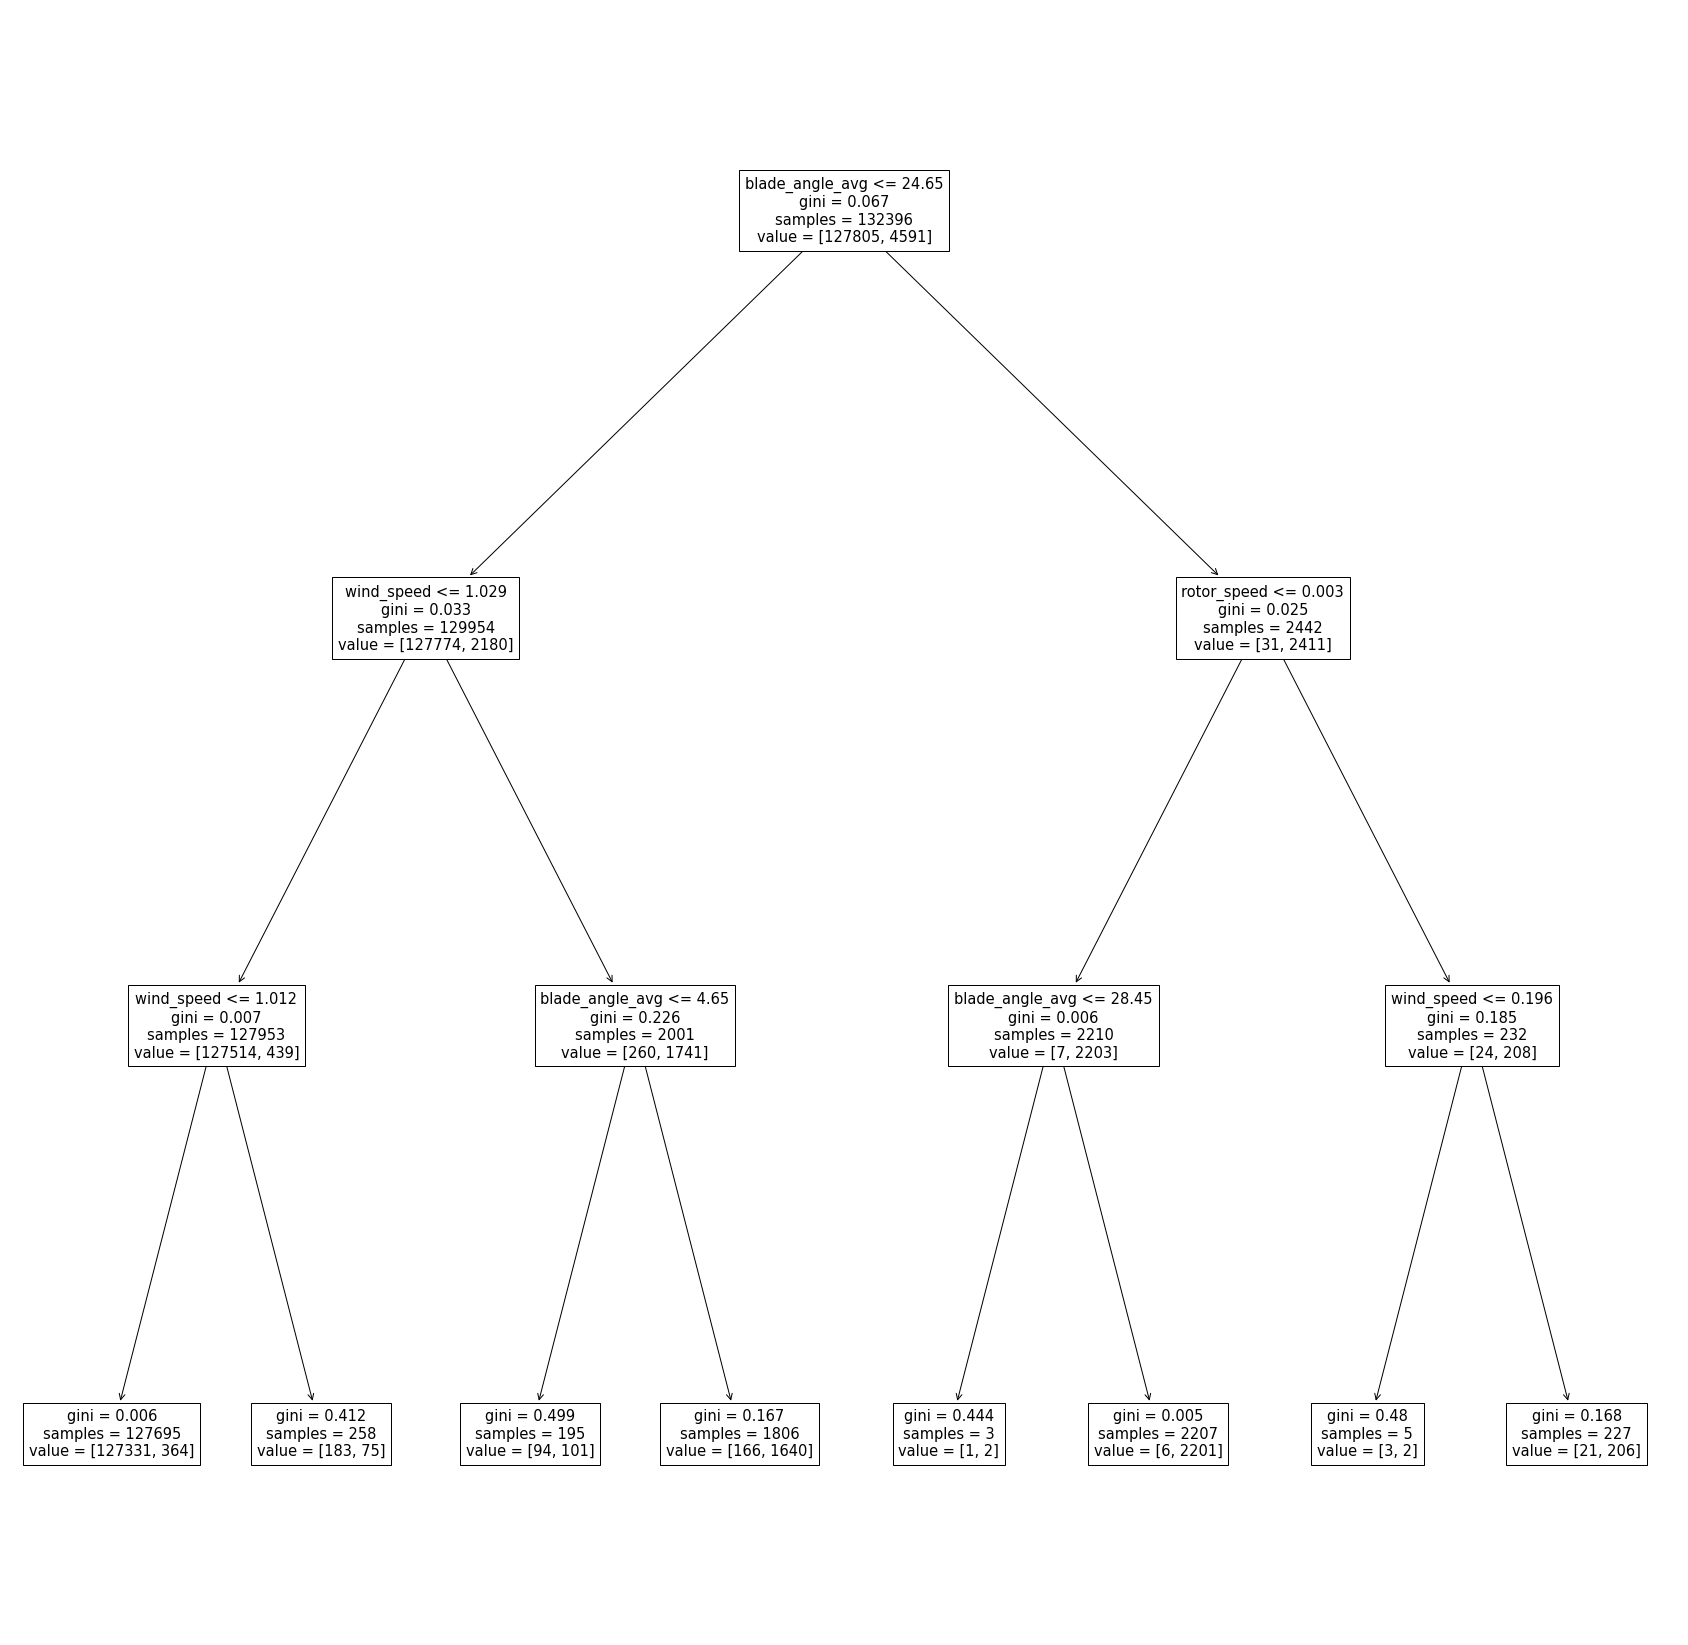

In [77]:
from sklearn.tree import plot_tree
plt.figure(figsize=(30,30))
plot_tree(clf,feature_names=X_test2.columns)

In [75]:
import sklearn.tree as tree
def plot_tree_model(model, df):
    import graphviz # sudo apt-get update && sudo apt-get install graphviz -y; pip install graphviz
    feature_names = df.columns
    dot_data = tree.export_graphviz(model, out_file=None, feature_names=feature_names, class_names=["false", "true"], filled=True) 
    graph = graphviz.Source(dot_data)
    return graph